Stavolta sto bene

In [1]:
# =============================================================================
# Fake Nodes 2D: the lines approach
# =============================================================================

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter("ignore")
from lagrange import lagrange_interp

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pylab import meshgrid
import time

In [2]:
#Functions
def S(x):
    a = x.min(); b = x.max()
    return (a-b)/2*np.cos(np.pi*(x-a)/(b-a))+(a+b)/2 # Chebyshev

def slice_interpolation(X,Y,F,XX,YY, mapping = None):
    if mapping is None:
        mapping = lambda x: x
    S = lambda x: x
    m,n = X.shape; M,N = XX.shape
    x_slices = np.zeros((m,N))
    interp_values = np.zeros((M,N))

    for i in range(0,m):
        x_slices[i,:] = lagrange_interp( mapping(XX[0,:]), mapping(X[0,:]), F[i,:] )
    for i in range(0,N):
        interp_values[:,i] = lagrange_interp( mapping(YY[:,0]), mapping(Y[:,0]), x_slices[:,i] )
    
    return interp_values

In [3]:

N_x = 13   # Number of nodes in the x axis
N_y = 15 # Number of nodes in the y axis

N_evx = 81
N_evy = 91

domain = [-1,1,-1,1]


f = lambda x,y: 1./(1+5*(x**2+y**2))
#f = lambda x,y : 3*np.exp(-(x**2+y**2))+np.exp(-((x-2)**2+(y-2)**2))+2*np.exp(-((x+2)**2+(y+2)**2))
#f = lambda x,y : np.exp(-((x-2)**2+(y-2)**2))+1/50*(x*y)+np.cos(1/5*(x+y))
#f = lambda x,y : x*y + 2*x

x_nodes = np.linspace(*domain[:2],N_x);  # Equispaced samples
x_ev = np.linspace(*domain[:2],N_evx)
y_nodes = np.linspace(*domain[2:],N_y);  # Equispaced samples
y_ev = np.linspace(*domain[2:],N_evy)

X,Y = meshgrid(x_nodes,y_nodes)
F = f(X,Y)

XX,YY = meshgrid(x_ev, y_ev) # grid of point


FF_equi = slice_interpolation(X,Y,F,XX,YY)

FF_CL   = slice_interpolation(S(X),S(Y),f(S(X),S(Y)),XX,YY)

FF_fake = slice_interpolation(X,Y,F,XX,YY,mapping=S)

Z = f(XX,YY) # evaluation of the function on the grid

Z_CL = f(S(XX),S(YY))

(0, 1)

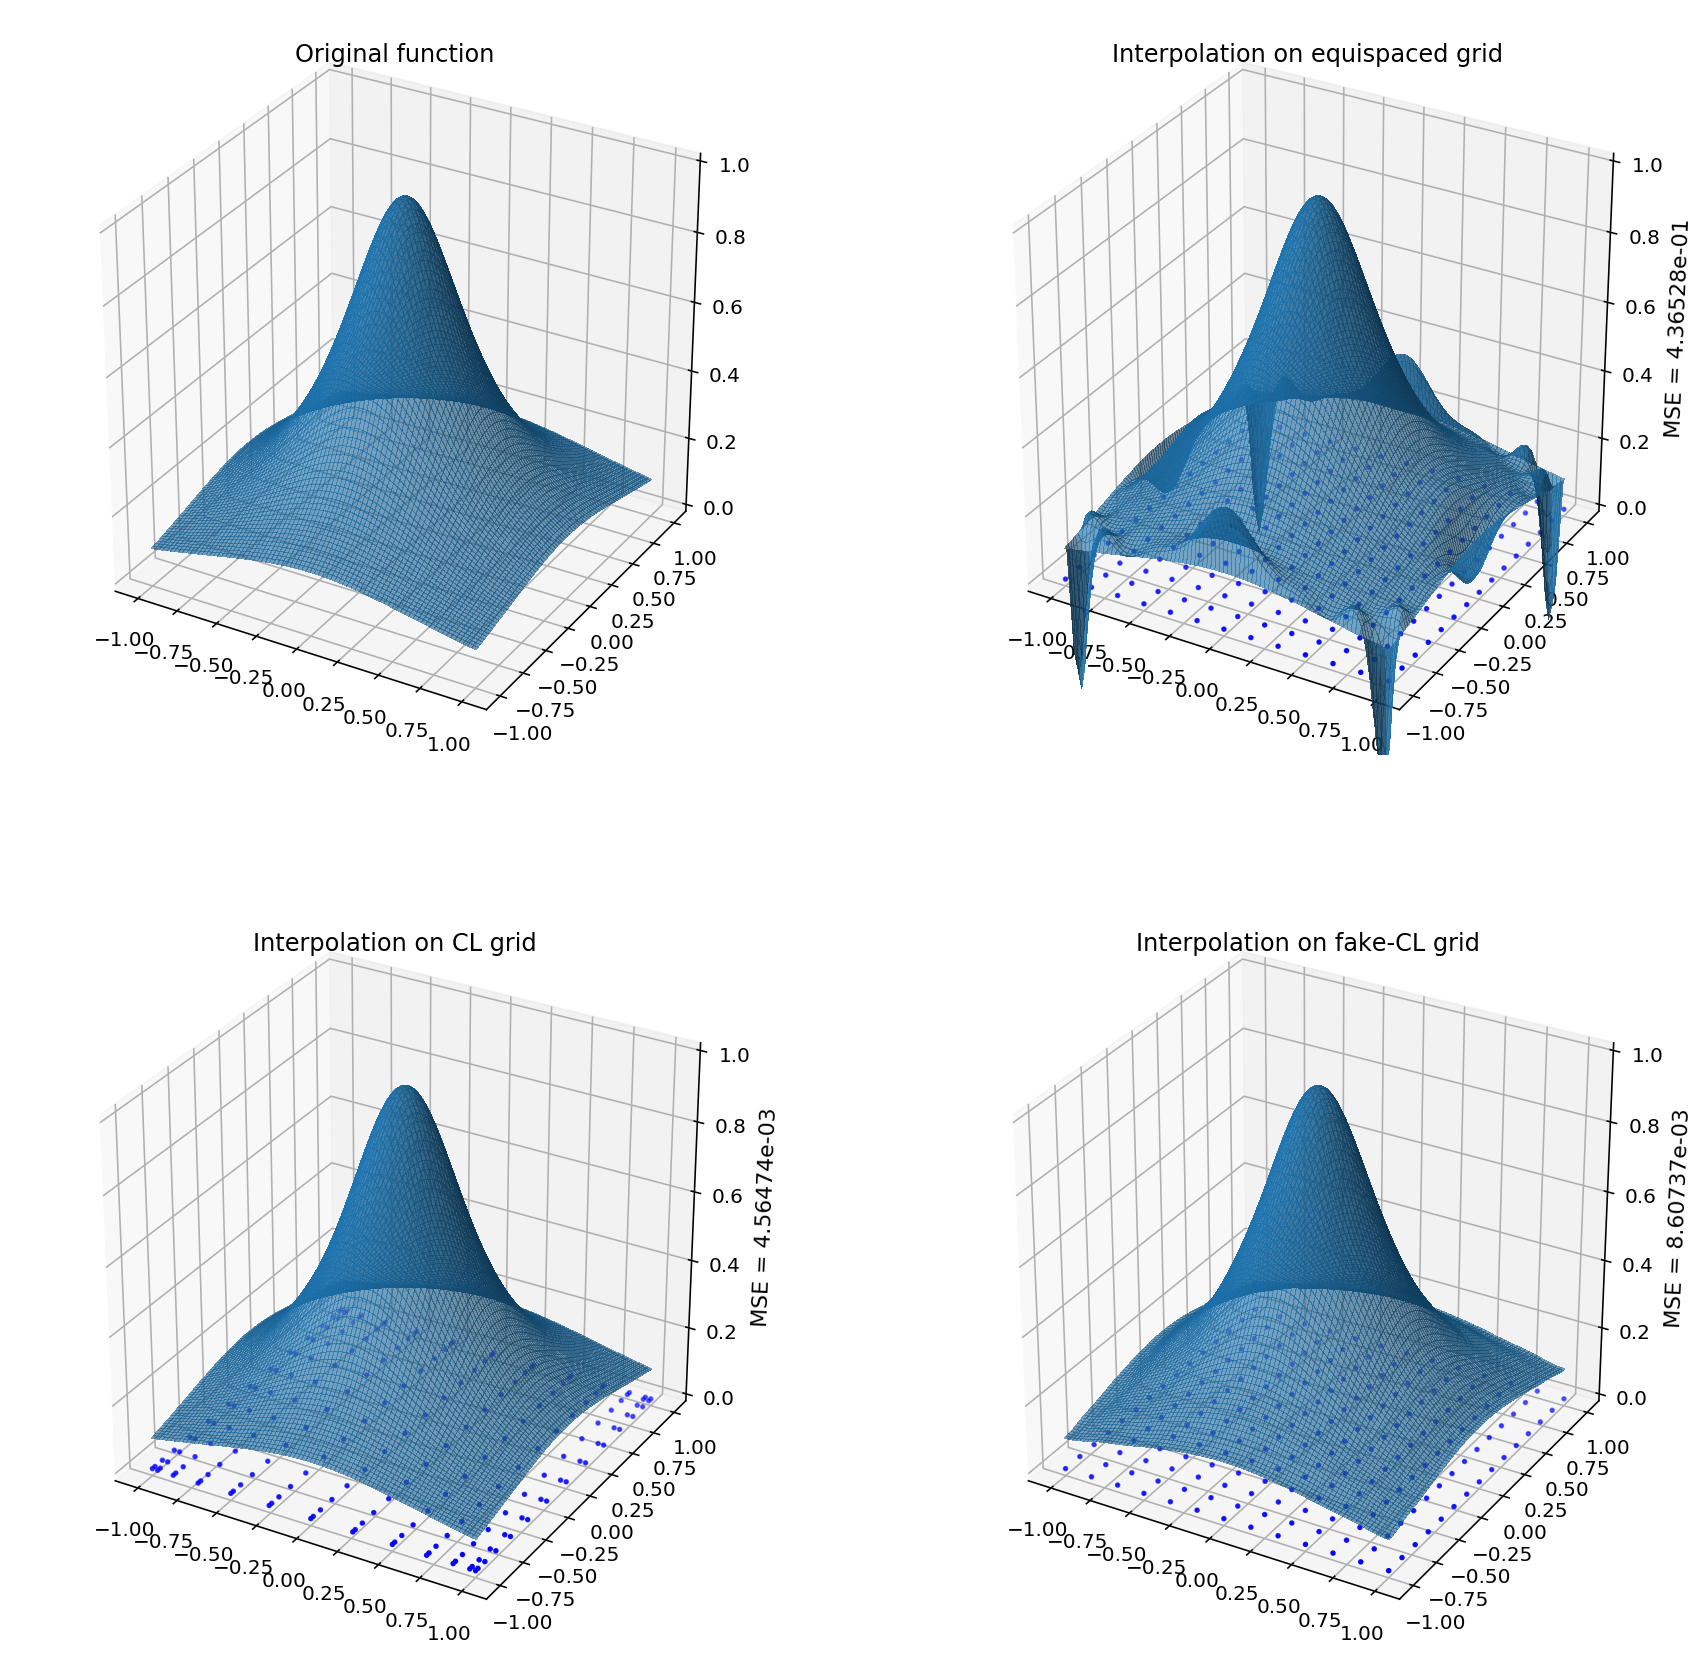

In [4]:
alpha = .6; s = 50
n_eval = np.prod(XX.shape)

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
ax1.set_title("Original function")
ax1.set_zlim([0,1])
#ax1.scatter(X, Y, f_fake, c='r', marker = '.')
##
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.plot_surface(XX, YY, FF_equi, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
#ax2.scatter(x, y, f(x,y), c='r',s=s, marker = '*', zorder = 3)
ax2.scatter(X, Y, 0, c='b',s=s//4, marker = '.')
ax2.set_title("Interpolation on equispaced grid")
ax2.set_zlabel("MSE = %5.5e"%(np.linalg.norm(FF_equi.reshape(-1) - Z.reshape(-1), np.inf)), fontsize=11)
ax2.set_zlim([0,1])
##
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.plot_surface(XX, YY, FF_CL, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
#ax3.scatter(pdx, pdy, f(pdx,pdy), c='r', s=s, marker = '*', zorder = 3)
ax3.scatter(S(X),S(Y), 0, c='b',s=s//4, marker = '.')
ax3.set_title("Interpolation on CL grid")
ax3.set_zlabel("MSE = %5.5e"%(np.linalg.norm(FF_CL.reshape(-1) - Z.reshape(-1), np.inf)), fontsize=11)
ax3.set_zlim([0,1])
##
ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.plot_surface(XX, YY, FF_fake, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
#ax4.scatter(x, y, f(x,y), c='r', s=s, marker = '*', zorder = 3)
ax4.scatter(X, Y, 0, c='b',s=s//4, marker = '.')
ax4.set_title("Interpolation on fake-CL grid")
ax4.set_zlabel("MSE = %5.5e"%(np.linalg.norm(FF_fake.reshape(-1) - Z.reshape(-1), np.inf )), fontsize=11)
ax4.set_zlim([0,1])
#fig.title(['Original function', 'a', 'b'])

In [5]:

def errors(N):
    N_x = N; N_y = N

    N_evx = 90
    N_evy = 90

    domain = [-1,1,-1,1]


    f = lambda x,y: 1./(1+5*(x**2+y**2))
    #f = lambda x,y : 3*np.exp(-(x**2+y**2))+np.exp(-((x-2)**2+(y-2)**2))+2*np.exp(-((x+2)**2+(y+2)**2))
    #f = lambda x,y : np.exp(-((x-2)**2+(y-2)**2))+1/50*(x*y)+np.cos(1/5*(x+y))
    #f = lambda x,y : x*y + 2*x

    x_nodes = np.linspace(*domain[:2],N_x);  # Equispaced samples
    x_ev = np.linspace(*domain[:2],N_evx)
    y_nodes = np.linspace(*domain[2:],N_y);  # Equispaced samples
    y_ev = np.linspace(*domain[2:],N_evy)

    X,Y = meshgrid(x_nodes,y_nodes)
    F = f(X,Y)

    XX,YY = meshgrid(x_ev, y_ev) # grid of point


    FF_equi = slice_interpolation(X,Y,F,XX,YY)

    FF_CL   = slice_interpolation(S(X),S(Y),f(S(X),S(Y)),XX,YY)

    FF_fake = slice_interpolation(X,Y,F,XX,YY,mapping=S)

    Z = f(XX,YY) # evaluation of the function on the grid

    Z_CL = f(S(XX),S(YY))
    
    err_e = np.linalg.norm(Z - FF_equi)**2 / (np.prod(Z.shape))
    err_cl = np.linalg.norm(Z - FF_CL)**2 / (np.prod(Z.shape))
    err_f = np.linalg.norm(Z - FF_fake)**2 / (np.prod(Z.shape))
    return err_e, err_cl, err_f

In [6]:
E = []
Nrange = list(range(2,31,2))
for N in Nrange:
    E.append(errors(N))
E = np.array(E)

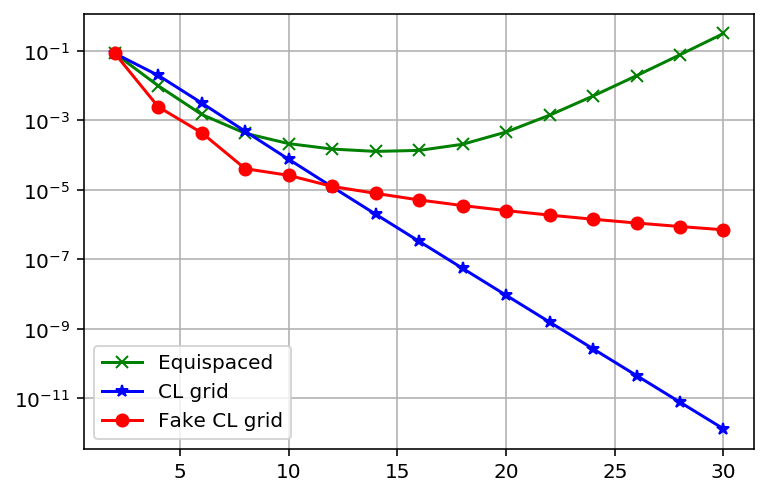

In [7]:
plt.semilogy(Nrange, E[:,0], '-xg')
plt.semilogy(Nrange, E[:,1], '-*b')
plt.semilogy(Nrange, E[:,2], '-or')
plt.legend(['Equispaced','CL grid','Fake CL grid'])
plt.grid()